In [87]:
#import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns
#import dataset
train_data=pd.read_csv("https://raw.githubusercontent.com/1b5b/ML-homework/main/train.csv") #訓練模型檔
train_data.head()
train_data.info()

test_data=pd.read_csv("https://raw.githubusercontent.com/1b5b/ML-homework/main/test.csv") #檢驗檔
test_data.head()
test_data.info()

print(train_data.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  

In [88]:
#資料分析
average_age = train_data['Age'].mean()
print(average_age)

a=0
for i in range(8693):
  if train_data.iloc[i]['VIP'] ==True and train_data.iloc[i]['Transported'] ==True:
    a=a+1
print(a/8692)

b=0
for i in range (8693):
  if train_data.iloc[i]['CryoSleep'] ==True and train_data.iloc[i]['Transported'] ==True:
    b=b+1
print(b/8692)

c=0
for i in range(8693):
  if train_data.iloc[i]['HomePlanet'] == 'Europa' and train_data.iloc[i]['Transported'] ==True:
    c=c+1
print (c/8692)

d=0
for i in range(8693):
  if train_data.iloc[i]['Destination'] == 'PSO J318.5-22' and train_data.iloc[i]['Transported'] ==True:
    d=d+1
print (d/8692)

28.82793046746535
0.008743672342383801
0.28566497929130236
0.16152784169351128
0.046134376438104


In [89]:
#訓練模型
from sklearn.ensemble import RandomForestClassifier
y = train_data["Transported"]


features = ["HomePlanet", "CryoSleep", "VIP"]
X = pd.get_dummies (train_data[features])
X_test = pd.get_dummies (test_data[features])


model = RandomForestClassifier (n_estimators=100, max_depth=5, random_state=1)
model.fit(X,y)
predictions = model.predict (X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Transported': predictions})
output.to_csv('submission.csv', index=False)


print("First 10 predictions:", predictions[:10])
print("Last 10 predictions:", predictions[-10:])

print("\nYour submission was successfully saved!")

import os
print("\nCurrent working directory:", os.getcwd())

First 10 predictions: [ True False  True False False False  True  True  True False]
Last 10 predictions: [ True False  True False False  True False  True False  True]

Your submission was successfully saved!

Current working directory: /content


<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


,PassengerId,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,False,B/0/P,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,False,F/0/S,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,False,A/0/S,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,False,A/0/S,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,False,F/1/S,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


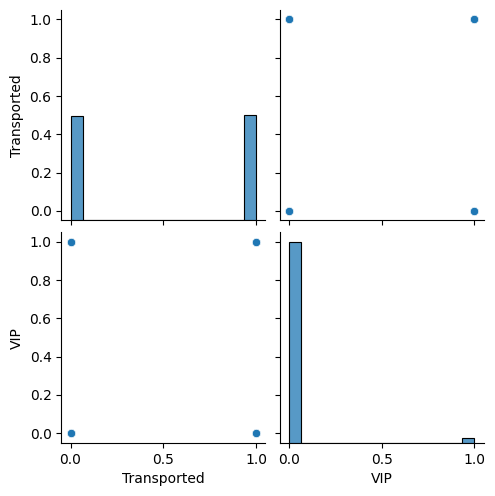

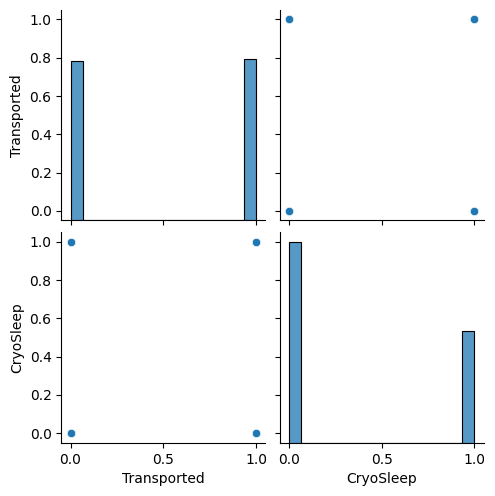

In [90]:
#畫圖比較(放在這比較不會影響檔案內容)

sns.pairplot(train_data[['Transported', 'VIP']], dropna=True)

sns.pairplot(train_data[['Transported', 'CryoSleep']], dropna=True)

new_train_data = train_data.drop(['HomePlanet', 'Destination'], axis=1)
new_train_data.head()
